# Labor zu Stichprobenverteilungen und Standardfehlern
## 
#### Literatur: 
- Bruce et al. Praktische Statistik für Data Scientists, Kapitel 1 bis Seite 27, Kapitel 2 bis Standardfehler
- Sauer Moderne Datenanalyse mit R, Kapitel 17.1. 17.2
- Python-Dokumentationen

#### Sie werden hier:
- kontinuierliche Daten visualisieren und zusammenfassen
- erkunden, was bei wiederholter Messung passiert: Stichprobenverteilung und Standardfehler

#### Lernziele:
- kontinuierliche Daten in Histogrammen visualisieren und diese interpretieren können
- Unterschied zwischen Verteilung der Messwerte und der Verteilung eines gesuchten Parameters (Stichprobenverteilung) verstehen
- Stichprobenverteilung und Standardfehler kennen und interpretieren können
- ein anschauliches Verständnis des zentralen Grenzwertsatzes haben

#### Output (Abfrage über moodle):
- Formulieren Sie eine Erkenntnis, die Sie bei der Bearbeitung des Labors gewonnen haben.
- Formulieren Sie eine Frage, die bei Ihnen offen geblieben ist.


In [1]:
# Nötige Module importieren

# Plotten
import matplotlib.pyplot as plt
import seaborn

# Zum (einfacheren) Erstellen guter statistischer Plots:
import seaborn as sns

seaborn.set_theme()  # alle Plots (auch von matplotlib) im seaborn-Style

# Numerische und statistisches Operationen
import numpy as np
from scipy import stats
import statsmodels.api as sm

## 1. Kontinuierliche Daten in Histogrammen darstellen: Verteilung der Messwerte

Wir nutzen wieder den NYC Flights Datensatz (ohne nans) und schauen uns die Verspätungen bei Ankunft `arr_delay` genauer an.

Kontinuierliche Daten visualisiert man mit "statistischen" Plots: Histogramm, (empirische) Verteilungsfunktion, etc. Auch ein Boxplot zeigt immerhin 5 Quantile und damit nicht nur Lage und Streuung, sondern auch etwas von der "Form" der Verteilung der Daten.

Beim Histogramm ist wichtig:
- Daten werden in Klassen (Bins) zusammengefasst ⇒ geeignete Anzahl Klassen wählen
- Histogramm ist eine flächentreue Darstellung ⇒ geeignete Normierung wählen (y-Achse)


c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


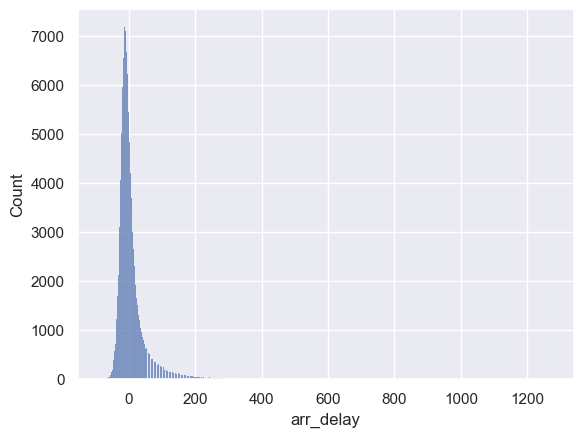

In [2]:
from nycflights13 import flights

fls = flights.dropna()

sns.histplot(fls.arr_delay);

#### a) Klassen beim Histogramm

Testen Sie verschiedene Anzahl Klassen. Typische Faustregeln:
- $2 \sqrt{n}$
- $< \sqrt{n}$ für große Stichproben
- $10\log_{10} n$

aber: am wichtigsten ist der optische Eindruck!

c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


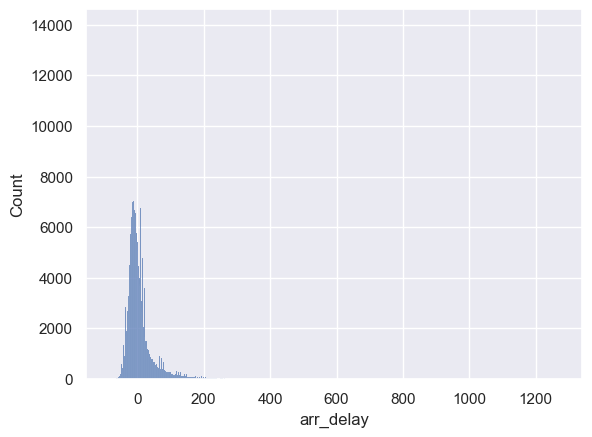

In [3]:
anzahl = len(fls.arr_delay)
n_bins = int(np.round(2 * np.sqrt(anzahl), 0))  # np.round(zahl, 0) rundet auf 0 Nachkommastellen, da #Bins ganzzahlig sein muss
sns.histplot(fls.arr_delay, bins=n_bins)
#plt.xlabel('Arrival delay / min') #Um automatisch eine korrekte Beschriftung incl. Einheit zu erhalten, könnte man auch die Variable entsprechend benennen. Das ist Geschmackssache.
#plt.ylabel('Number of flights') #Vorsicht bei der Beschriftung der Achsen. Je nach Normierung der y-Achse muss eine manuelle Beschriftung angepasst werden!
plt.show()

Was passiert beim Ändern der Klassenanzahl mit der y-Achse?

#### b) Normierung beim Histogramm

In matplotlib lässt sich die Normierung auf `density=True` und `density=False` stellen. Welchen Einfluss hat das?
In seaborn sind über `stat = ...` die üblichen weiteren Möglichkeiten gegeben:
https://seaborn.pydata.org/generated/seaborn.histplot.html:

```
    Aggregate statistic to compute in each bin.
    
        count: show the number of observations in each bin
    
        frequency: show the number of observations divided by the bin width
    
        probability or proportion: normalize such that bar heights sum to 1
    
        percent: normalize such that bar heights sum to 100
    
        density: normalize such that the total area of the histogram equals 1
```
Schauen Sie sich die verschiedenen Varianten an und überlegen Sie, was sie bedeuten. Häufig wird ohne genaueres Hinschauen "count" verwendet. Dann ist aber die Fläche nicht auf 1 normiert und der Vergleich mit der Dichtefunktion funktioniert nicht richtig. Daher: Wenn das Histogramm mit einer Dichtefunktion verglichen wird, sollte `stat=density` verwendet werden!


c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

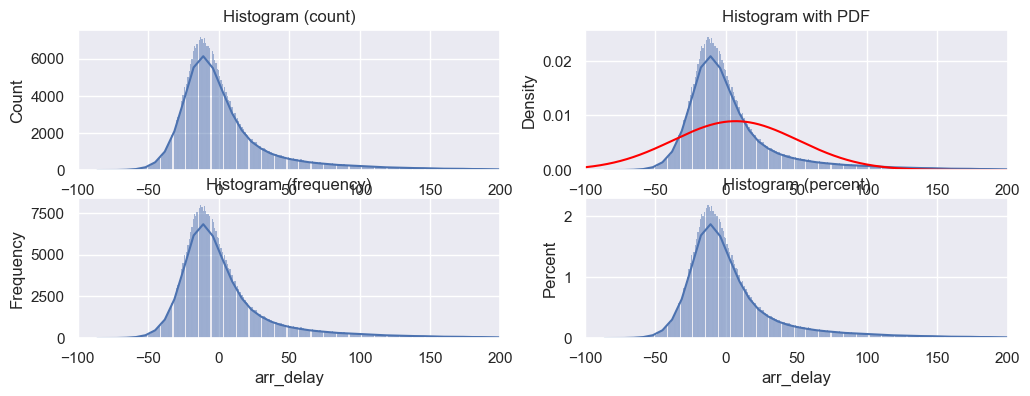

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 4))

x = np.linspace(-100, 200, 1000)

sns.histplot(data=fls, x='arr_delay', kde=True, stat='count', ax=axs[0][0])
sns.histplot(data=fls, x='arr_delay', kde=True, stat='density', ax=axs[0][1])
sns.histplot(data=fls, x='arr_delay', kde=True, stat='frequency', ax=axs[1][0])
sns.histplot(data=fls, x='arr_delay', kde=True, stat='percent', ax=axs[1][1])
axs[0][1].plot(x, stats.norm.pdf(x, loc=fls.arr_delay.mean(), scale=fls.arr_delay.std()),
            color='red')  # Normalverteilung mit Mittelwert und Standardabweichung der Stichprobe, Dichte ist normiert auf 1

axs[0][0].set_xlim(-100, 200)
axs[0][1].set_xlim(-100, 200)
axs[1][0].set_xlim(-100, 200)
axs[1][1].set_xlim(-100, 200)
axs[0][0].set_title('Histogram (count)')
axs[0][1].set_title('Histogram with PDF')
axs[1][0].set_title('Histogram (frequency)')
axs[1][1].set_title('Histogram (percent)')

plt.show()

## 2. Stichprobenverteilung: Verteilung der Parameter

Bisher haben wir uns angeschaut, wie die Variable `arr_delay` verteilt ist. Normalerweise haben wir aber nicht alle Daten (die sog. Grundgesamtheit oder Population) vorliegen, sondern nur eine Stichprobe. Trotzdem wollen wir eine Aussage über alle Daten treffen, d.h. wir würden gerne anhand unserer Stichprobe einschätzen wie die Grundgesamtheit aussieht. Diesem Vorgehen nähern wir uns hier von Simulationsseite. Wir stellen uns vor, die Grundgesamtheit sind alle NYC Flüge aus 2013 aber wir hätten nur eine Stichprobe. Was könnten wir dann über die Flüge sagen?

#### a) Stichprobenverteilung des Mittelwerts
Zunächst versuchen wir aus einer Stichprobe des Datensatzes eine Aussage über die mittlere Verspätung im Jahr 2013 zu treffen. Dazu werden wir
- eine Stichprobe ziehen und den Mittelwert berechnen.
- nochmal eine Stichprobe ziehen $\rightarrow$ Was ist anders?
- ganz häufig Stichproben ziehen und eine Stichprobenverteilung für den Mittelwert erstellen


sample1 with mean 5.2: [-3.0, -4.0, 25.0, 21.0, -13.0]
sample2 with mean -27.2: [-28.0, -43.0, -32.0, -30.0, -3.0]


c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


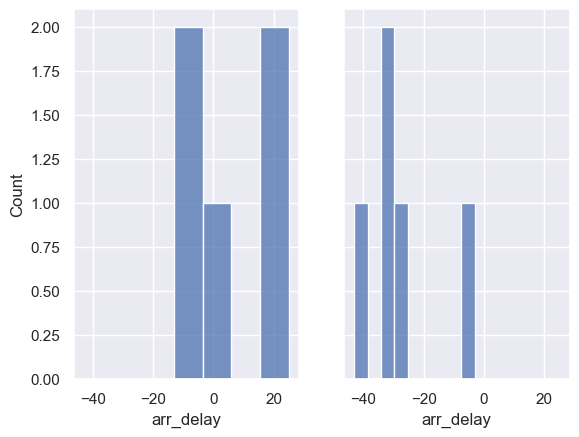

In [25]:
# Wir ziehen zweimal eine Stichprobe, berechnen ihren Mittelwert und visualisieren die Stichprobe
sample1 = fls.sample(5).arr_delay
sample2 = fls.sample(5).arr_delay

print(f"sample1 with mean {sample1.mean()}: {sample1.tolist()}")
print(f"sample2 with mean {sample2.mean()}: {sample2.tolist()}")

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
sns.histplot(sample1, ax=axs[0])
sns.histplot(sample2, ax=axs[1])
plt.show()

In [7]:
# Wir wiederholen das nun für verschiedene Stichprobengrößen je 1000x
n_replics = 1000
sample_sizes = [5, 30, 100]
np.random.seed(123)

means_by_sample_size = []


"""
Ich verwende hier list comprhensions, sie sind kompakter und schneller als Schleifen. Sie können stattdessen auch eine Schleife verwenden.
https://www.w3schools.com/python/python_lists_comprehension.asp

Beispiel:
>>> numbers = [1, 2, 3, 4]
>>> squares = [n**2 for n in numbers]
>>> print(squares)
[1, 4, 9, 16]

Für jedes n aus sample_sizes tue 1000x:
    - ziehe n Stichproben und  berechne den Mittelwert
    - speichere die Mittelwerte in einer Liste
    
Als Resultat erhalten wir eine Liste, die 3 Listen (für die 3 Stichprobengrößen) mit jeweils 1000 Mittelwerten enthält.
"""
for sample_size in sample_sizes:
    means_by_sample_size.append([flights.sample(sample_size).arr_delay.mean() for _ in range(n_replics)])





In [12]:
np.random.seed(123)
median_by_sample_size = []
for sample_size in sample_sizes:
    median_by_sample_size.append([flights.sample(sample_size).arr_delay.median() for _ in range(n_replics)])

In [17]:
print(np.size(median_by_sample_size[2]))

1000


c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


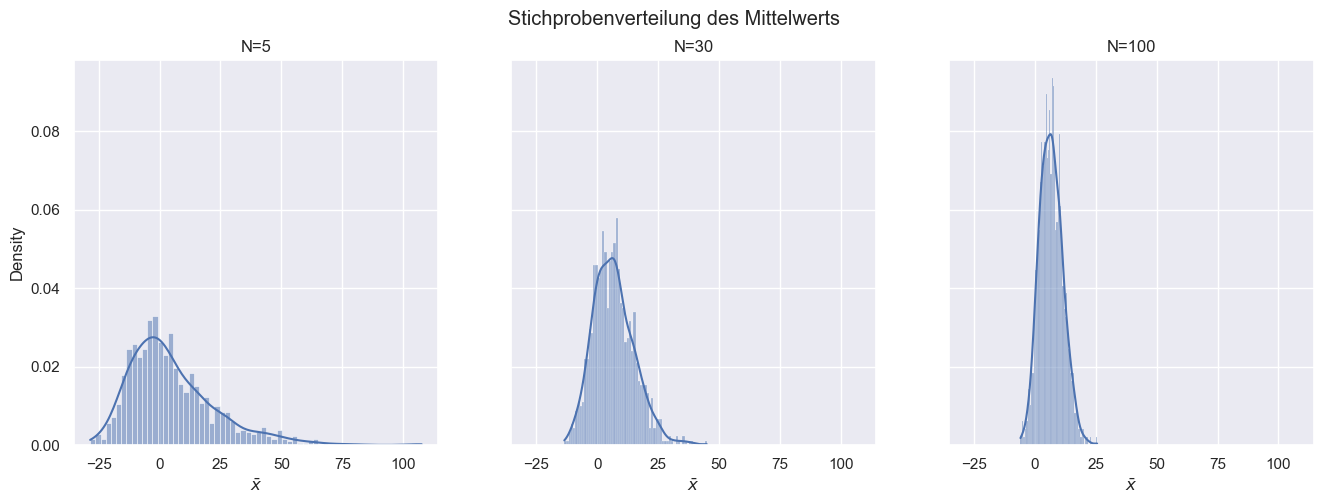

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

fig.suptitle("Stichprobenverteilung des Mittelwerts")

for i, means in enumerate(means_by_sample_size):
    sns.histplot(means, bins=64, kde=True, stat="density", ax=axs[i])
    axs[i].set_xlabel(r'$\bar{x}$')
    axs[i].set_title(f"N={sample_sizes[i]}")


c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


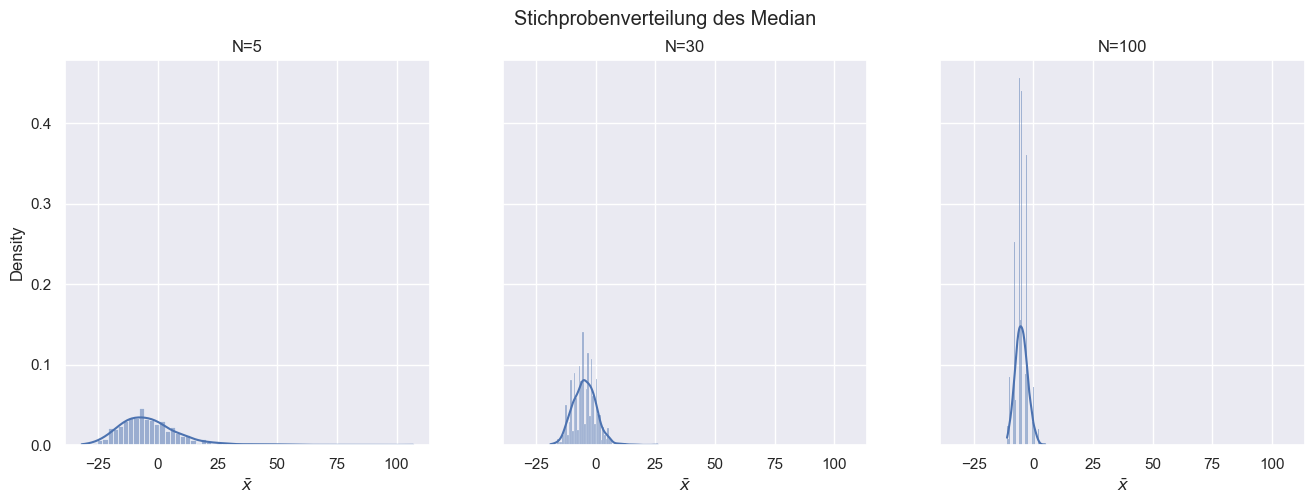

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

fig.suptitle("Stichprobenverteilung des Median")

for i, means in enumerate(median_by_sample_size):
    sns.histplot(means, bins=64, kde=True, stat="density", ax=axs[i])
    axs[i].set_xlabel(r'$\bar{x}$')
    axs[i].set_title(f"N={sample_sizes[i]}")

Diese Verteilungen des errechneten Parameters nennt man Stichprobenverteilung. In diesem Fall haben wir Stichprobenverteilungen für den Mittelwert erstellt.

Was fällt Ihnen beim Vergleich der sog. Stichprobenverteilungen auf?

Stellen Sie sich folgende Fragen:
- wie relevant ist die Streuung in der Stichprobe für die Stichprobenverteilung?
      --> mit steigender Anzahl der Stichprobe wird der Einfluss der Streuung geringer
- wie relevant ist die Stichprobengröße für die Stichprobenverteilung?
      --> mit steigender Stichprobengröße nähert sich die Verteilung einer Normalverteilung an. Die Mittelwerte rücken "näher zusammen"
- wie relevant ist die Verteilung der Daten für die Stichprobenverteilung? (das schauen wir uns unten genauer an)
      --> 
- was ist der Unterschied zwischen der Verteilung der Daten und der Stichprobenverteilung?
      --> Verteilung der Daten bezieht sich auf die Gesamtheit der Daten und die Stichprobenverteilung auf einer Auscchnitt der Daten
- gibt es für Sie eine Erkenntnis für die Praxis, z.B. bei der Analyse von Messdaten? 
    (Beispiel: Sie messen in einem Labor elektrische Kennzahlen und interessieren sich für den Mittelwert. Was geben Sie als Messergebnis an?) (Wir haben früher immer Mittelwert und Standardabweichung angegeben. Ist das sinnvoll? Überlegen Sie bessere Alternativen!)


#### b) Berechnung des Standardfehlers
Der Standardfehler (standard error (of the mean)) ist eine wichtige Kenngröße der Stichprobenverteilung und spielt eine zentrale Rolle bei Schätzungen. Lesen Sie im Buch nach welche Definitionen/Interpretationen es gibt.

Berechnen Sie den Standardfehler als Streuung (Standardabweichung) der Stichprobenverteilung. Wie verändert sich der Standardfehler mit der Stichprobengröße? Vergleichen Sie den Wert mit der theoretischen Formel für den Standardfehler des Mittelwerts.

In [9]:
#TODO: Berechnung des Standardfehlers für die unterschiedlichen Stichprobengrößen aus der Stichprobenverteilung und aus theoretischer Formel
np.random.seed(123)
sample_5 = flights.sample(5).arr_delay
sample_30 = flights.sample(30).arr_delay
sample_100 = flights.sample(100).arr_delay

sample_5_std = sample_5.std()
sample_30_std = sample_30.std()
sample_100_std = sample_100.std()

sample_5_se = sample_5_std / np.sqrt(5)
sample_30_se = sample_30_std / np.sqrt(30)
sample_100_se = sample_100_std / np.sqrt(100)


print(f"Standardfehler für Stichprobengröße 5 aus Formel: {sample_5_se}")
print(f"Standardfehler für Stichprobengröße 30 aus Formel: {sample_30_se}")
print(f"Standardfehler für Stichprobengröße 100 aus Formel: {sample_100_se}")
print("###############################################")
print(f"Standardfehler aus Verteilung für Größe 5: {np.std(means_by_sample_size[0])}")
print(f"Standardfehler aus Verteilung für Größe 30: {np.std(means_by_sample_size[1])}")
print(f"Standardfehler aus Verteilung für Größe 100: {np.std(means_by_sample_size[2])}")



Standardfehler für Stichprobengröße 5 aus Formel: 8.966604708583958
Standardfehler für Stichprobengröße 30 aus Formel: 8.020244977674668
Standardfehler für Stichprobengröße 100 aus Formel: 4.243127728637008
###############################################
Standardfehler aus Verteilung für Größe 5: 17.98667126757416
Standardfehler aus Verteilung für Größe 30: 8.434969565433258
Standardfehler aus Verteilung für Größe 100: 4.729228170753692


#### c) Stichprobenverteilung für weitere statistische Größen

Wie sehen Stichprobenverteilungen für andere statistische Größen aus? 
1. Wiederholen Sie die Analyse von oben für Median und Standardabweichung. Was fällt Ihnen auf?
2. Untersuchen Sie den Einfluss der Verteilung der Daten auf die Stichprobenverteilung. Dazu können Sie sich Daten aus anderen Verteilungen generieren (z.B. exponentialverteilt, gleichverteilt etc.) und dann die Stichprobenverteilungen anschauen. Alternativ können Sie folgende Visualisierung nutzen: https://onlinestatbook.com/stat_sim/sampling_dist/index.html
3. Sehen Sie einen Zusammenhang zum zentralen Grenzwertsatz?

Hier gibt es viele Erkenntnisse zu gewinnen, spielen Sie mit den Parametern und lassen Sie sich überraschen!


In [24]:
import numpy as np

np.random.seed(123)

sample_5 = flights.sample(5).arr_delay
sample_30 = flights.sample(30).arr_delay
sample_100 = flights.sample(100).arr_delay

sample_5_std = sample_5.std()
sample_30_std = sample_30.std()
sample_100_std = sample_100.std()

sample_5_se = sample_5_std / np.sqrt(5)
sample_30_se = sample_30_std / np.sqrt(30)
sample_100_se = sample_100_std / np.sqrt(100)

print(f"Standardfehler für Stichprobengröße 5 aus Formel: {sample_5_se}")
print(f"Standardfehler für Stichprobengröße 30 aus Formel: {sample_30_se}")
print(f"Standardfehler für Stichprobengröße 100 aus Formel: {sample_100_se}")
print("###############################################")

print(f"Standardfehler aus Verteilung der Mediane für Größe 5: {np.std(median_by_sample_size[0])}")
print(f"Standardfehler aus Verteilung der Mediane für Größe 30: {np.std(median_by_sample_size[1])}")
print(f"Standardfehler aus Verteilung der Mediane für Größe 100: {np.std(median_by_sample_size[2])}")


Standardfehler für Stichprobengröße 5 aus Formel: 8.966604708583958
Standardfehler für Stichprobengröße 30 aus Formel: 8.020244977674668
Standardfehler für Stichprobengröße 100 aus Formel: 4.243127728637008
###############################################
Standardfehler aus Verteilung der Mediane für Größe 5: 14.089583022573805
Standardfehler aus Verteilung der Mediane für Größe 30: 4.945097951507129
Standardfehler aus Verteilung der Mediane für Größe 100: 2.583679546693049


## 3. Output 
Als Output aus diesem Labor sammeln Sie Ihre Erkenntnisse und offenen Fragen. Tragen Sie Ihre wichtigste Erkenntnis und Ihre "größte" Frage bis Dienstagabend auf moodle ein. Diese Antworten nutze ich zur Vorbereitung der nächsten Vorlesung.